# Online Retail Classification and Clustering using K-Means Clustering Algorithm

## Data Preprocessing

### Importing the Libraries

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

### Get the dataset

In [6]:
dataset = pd.read_excel('Online Retail.xlsx')

In [7]:
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Filter out cancelled transactions (InvoiceNo starting with 'C')

In [9]:
# Filter out cancelled transactions (InvoiceNo starting with 'C')
def filterValidTransaction(invoiceNo):
    invoiceNo = str(invoiceNo)
    if invoiceNo.startswith('C'):
        return False
    else: return True

filtered_dataset = dataset[dataset['InvoiceNo'].apply(filterValidTransaction)]

In [10]:
filtered_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532621 non-null  object        
 1   StockCode    532621 non-null  object        
 2   Description  531167 non-null  object        
 3   Quantity     532621 non-null  int64         
 4   InvoiceDate  532621 non-null  datetime64[ns]
 5   UnitPrice    532621 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      532621 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.6+ MB


### Get the total number of customers that made valid transactions over the year

In [11]:
customer_count = len(filtered_dataset['CustomerID'].unique())
print(customer_count)

4340


### Get the total number of valid transactions

In [12]:
valid_transaction_count = len(filtered_dataset['InvoiceDate'].unique())
print(valid_transaction_count)

19990


In [13]:
filtered_dataset=filtered_dataset.drop('Description', axis=1)

### Get unique customer countries

In [14]:
filtered_dataset['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

### Create an aggregated variable named Amount, by multiplying Quantity with Price

In [15]:
filtered_dataset['Amount'] = filtered_dataset['Quantity']*filtered_dataset['UnitPrice']

### Separate the variable InvoiceDate into two variables Date and Time

In [16]:
filtered_dataset['Date']=filtered_dataset['InvoiceDate'].dt.date
filtered_dataset['Time']=filtered_dataset['InvoiceDate'].dt.time

### Filter out any transactions that do not have CustomerID associated with it

In [17]:
filtered_dataset = filtered_dataset.dropna(subset='CustomerID')

In [18]:
filtered_dataset.count()

InvoiceNo      397924
StockCode      397924
Quantity       397924
InvoiceDate    397924
UnitPrice      397924
CustomerID     397924
Country        397924
Amount         397924
Date           397924
Time           397924
dtype: int64

In [21]:
filtered_dataset = filtered_dataset.sort_values(by=['CustomerID'])

In [22]:
filtered_dataset.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Time
61619,541431,23166,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,2011-01-18,10:01:00
286633,562032,47559B,10,2011-08-02 08:48:00,1.25,12347.0,Iceland,12.50,2011-08-02,08:48:00
286627,562032,22372,4,2011-08-02 08:48:00,4.25,12347.0,Iceland,17.00,2011-08-02,08:48:00
286638,562032,23175,4,2011-08-02 08:48:00,3.25,12347.0,Iceland,13.00,2011-08-02,08:48:00
286637,562032,22423,3,2011-08-02 08:48:00,12.75,12347.0,Iceland,38.25,2011-08-02,08:48:00


### Generate a RFM (Recency, Frequency, Monetary) Model for our target data

In [42]:
# Calculate the most recent date in the dataset
latest_date = filtered_dataset["Date"].max()

In [55]:
rfm = filtered_dataset.groupby("CustomerID").agg(
    FirstPurchase=("Date", lambda x: x.min().strftime("%m")), # First Purchase (Month)
    Recency=("Date", lambda x: round((latest_date - x.max()).days/30)),  # Months since last purchase
    Frequency=("InvoiceNo", "nunique"),  # Number of unique transactions
    Monetary=("Amount", "sum"),  # Total spending
    Min=("Amount", "min"), # Minimum Spending
    Median=("Amount", "median"), # Median Spending
    Max=("Amount", "max") # Maximum Spending
).reset_index()

In [57]:
rfm.head()

,CustomerID,FirstPurchase,Recency,Frequency,Monetary,Min,Median,Max
0,12346.0,01,11,1,77183.60,77183.60,77183.60,77183.6
1,12347.0,12,0,7,4310.00,5.04,17.00,249.6
2,12348.0,12,2,4,1797.24,13.20,41.76,240.0
3,12349.0,11,1,1,1757.55,6.64,17.70,300.0
4,12350.0,02,10,1,334.40,8.50,19.80,40.0


### Exploratory Data Analysis

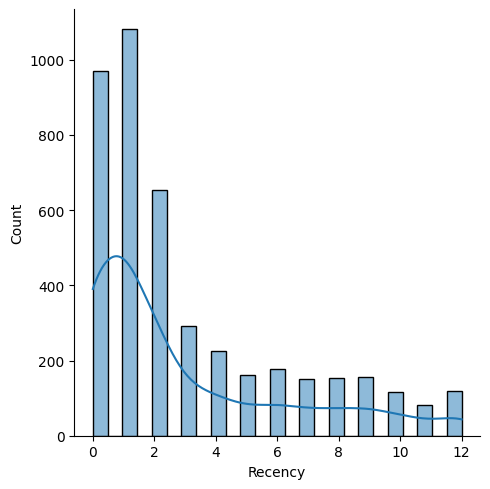

In [96]:
sns.displot(data=rfm, x="Recency", kde=True)

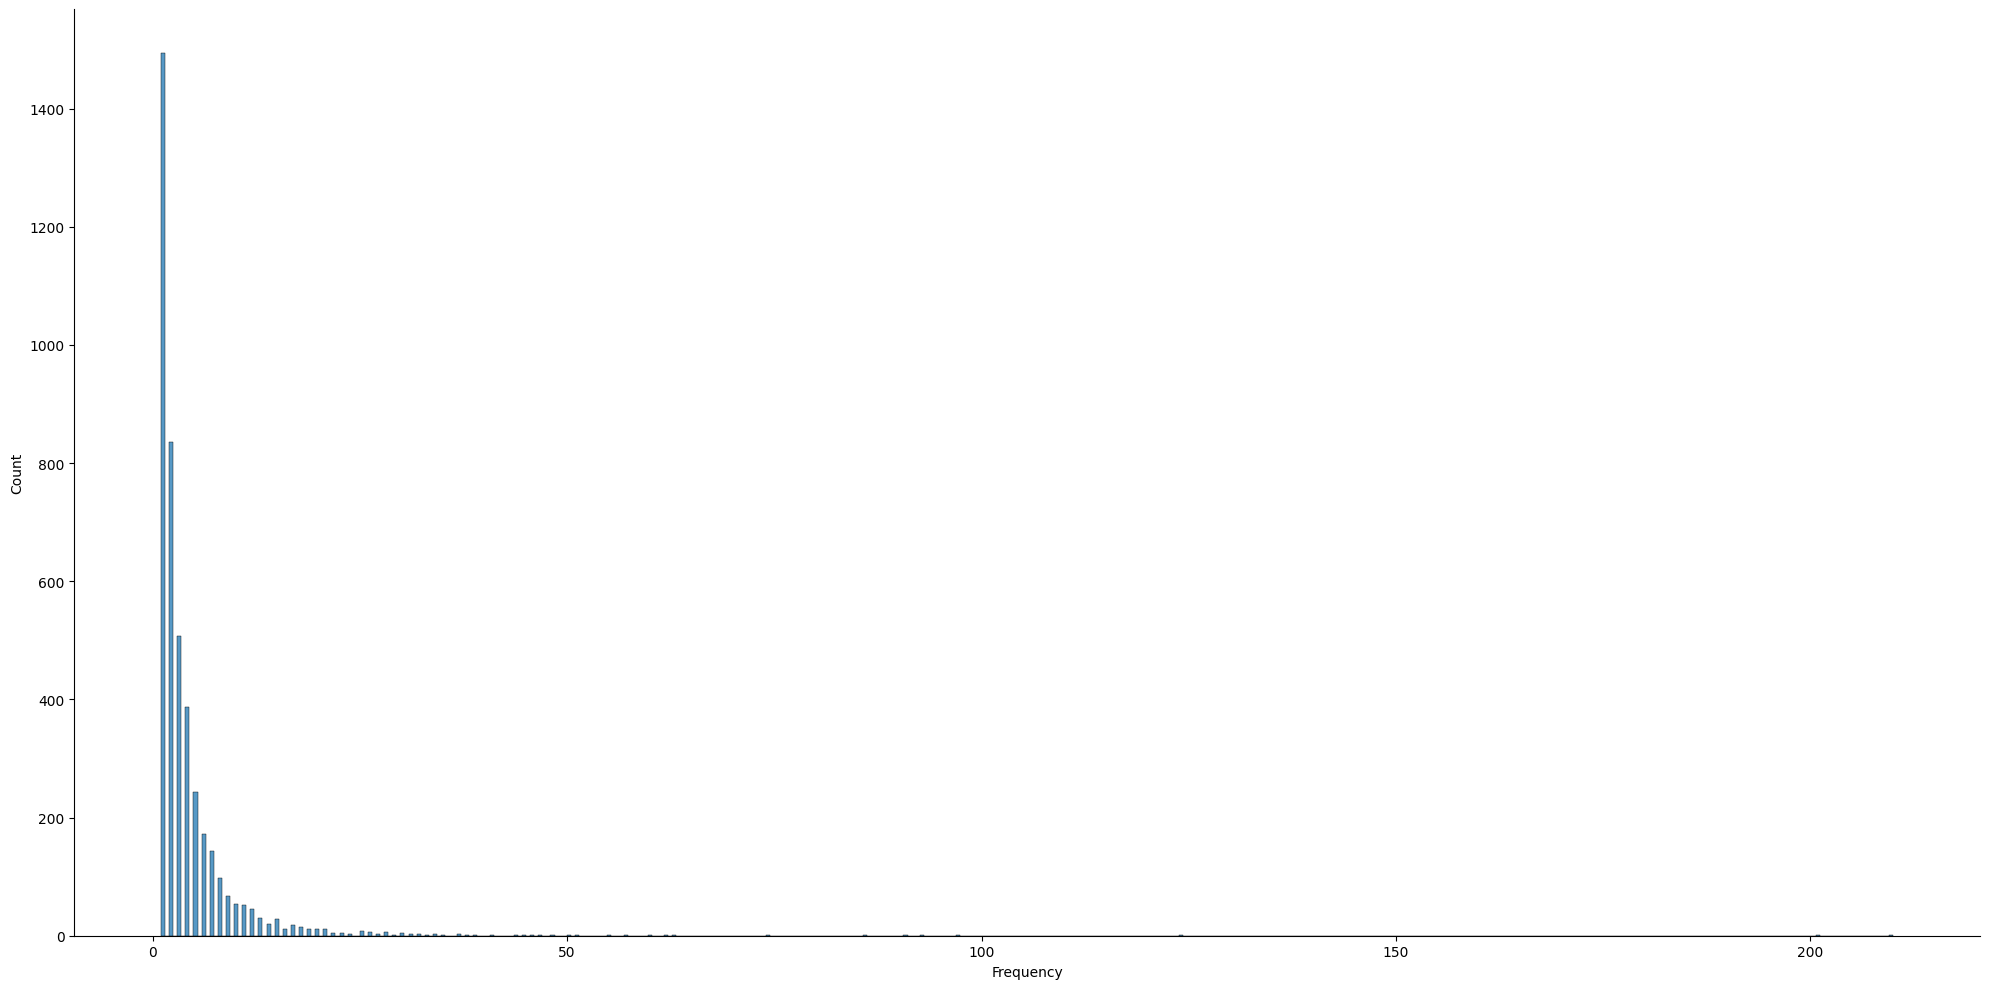

In [127]:
sns.displot(data=rfm, x="Frequency", height=10, aspect=2)

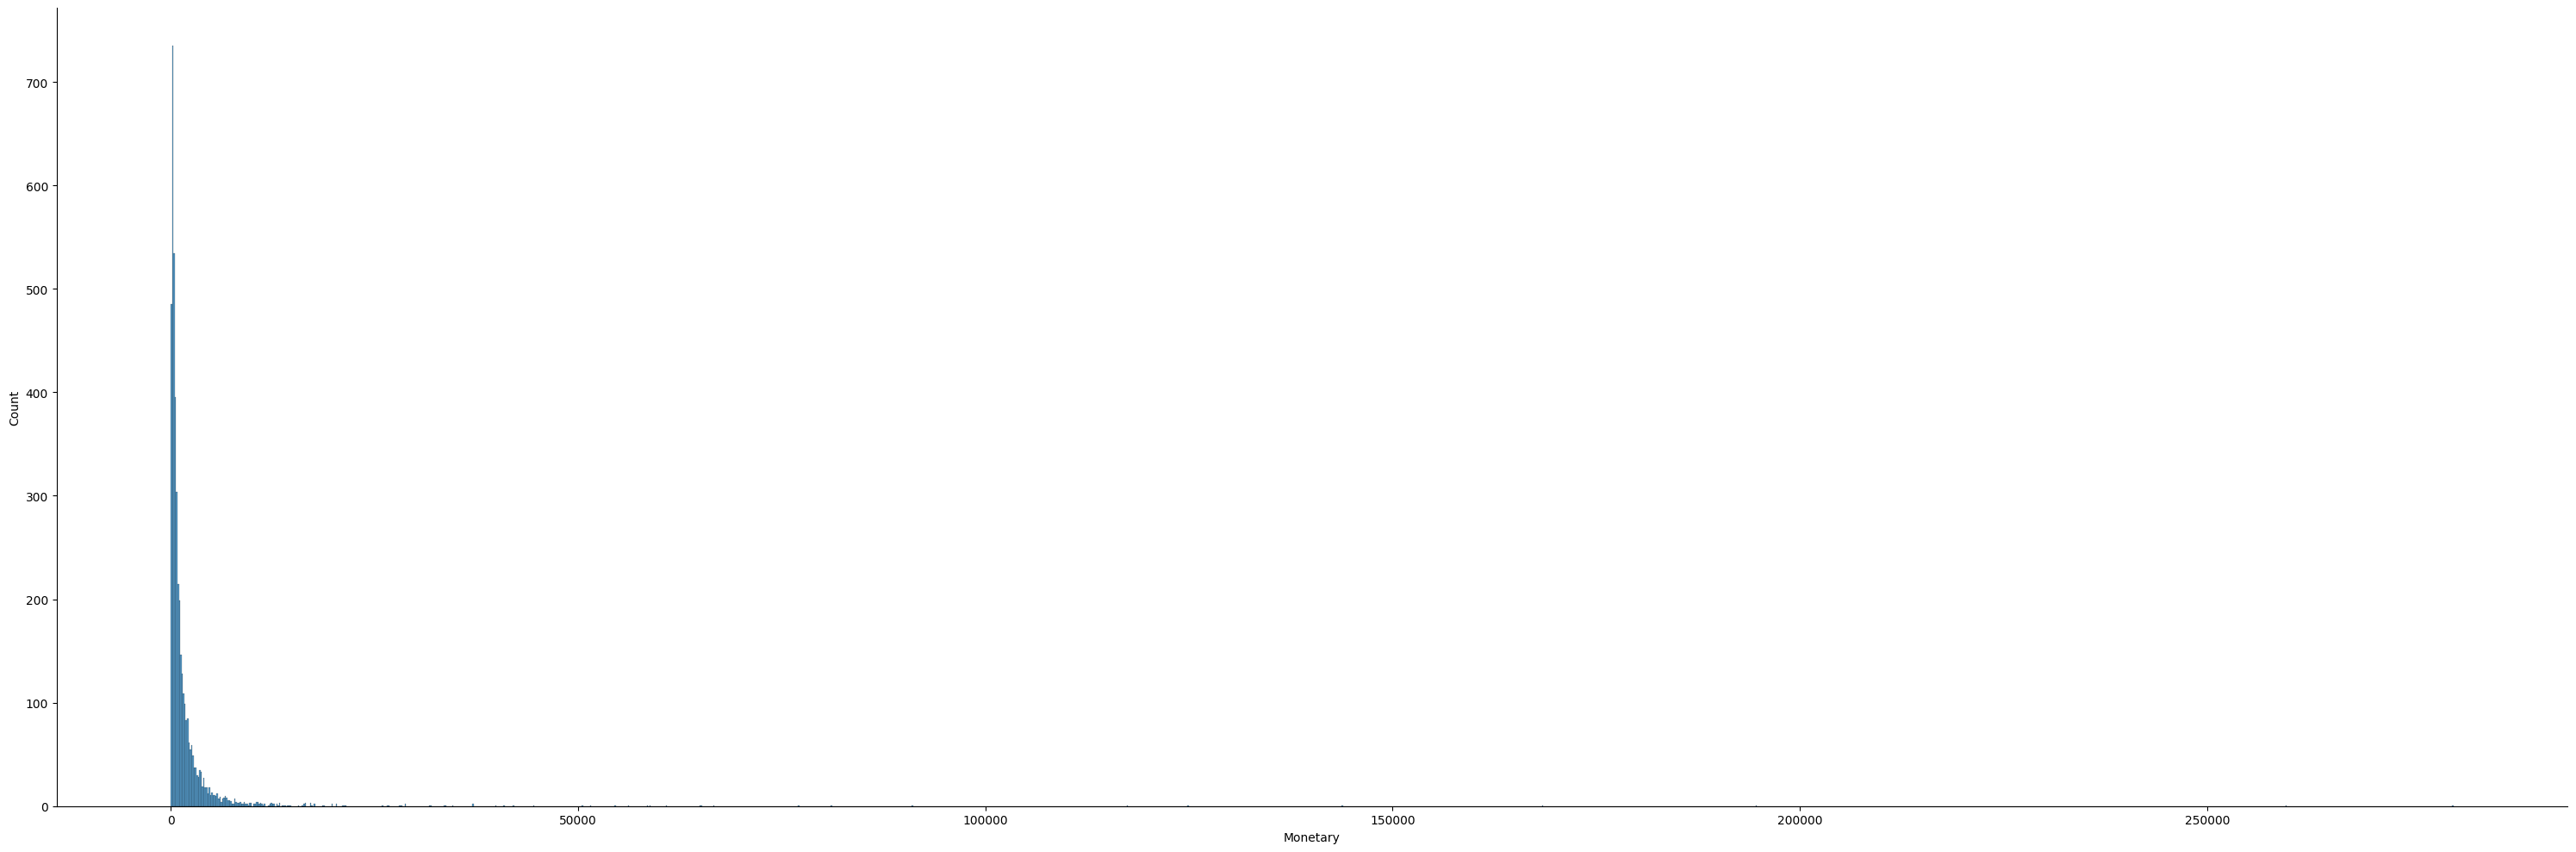

In [129]:
sns.displot(data=rfm, x="Monetary", height=10, aspect=3)

In [135]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary,Min,Median,Max
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,3.044711,4.271952,2053.793018,31.802077,46.527128,188.538550
std,1721.889758,3.346080,7.705493,8988.248381,1175.818632,1178.071936,2891.147844
min,12346.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,13812.500000,1.000000,1.000000,307.245000,0.950000,8.565000,31.800000
50%,15299.000000,2.000000,2.000000,674.450000,5.040000,15.750000,53.100000
75%,16778.500000,5.000000,5.000000,1661.640000,9.950000,18.000000,103.680000
max,18287.000000,12.000000,210.000000,280206.020000,77183.600000,77183.600000,168469.600000


### Remove Outliers from the data

In [145]:
rfm = rfm[rfm['Frequency'] < 30]
rfm = rfm[rfm['Monetary'] < 50000]

In [146]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary,Min,Median,Max
count,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000
mean,15301.520532,3.076062,3.710686,1452.623811,14.126555,28.234090,119.842245
std,1720.369355,3.345845,4.028175,2575.988519,101.009850,126.194329,647.421434
min,12347.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,13816.250000,1.000000,1.000000,305.560000,0.950000,8.557500,31.800000
50%,15305.000000,2.000000,2.000000,661.800000,5.040000,15.600000,51.000000
75%,16777.750000,5.000000,4.000000,1603.857500,9.950000,17.850000,102.000000
max,18287.000000,12.000000,29.000000,44534.300000,3861.000000,4388.500000,38970.000000


## Model Training

### Using the elbow method to find the optimal number of clusters

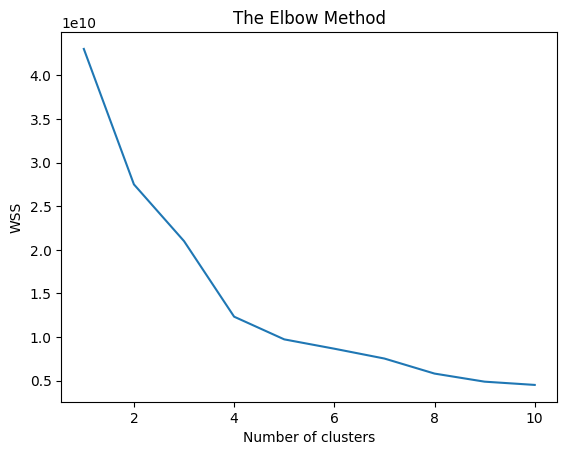

In [149]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()

#### There seem to be 4 optimal number of clusters

In [151]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
customer_clusters = kmeans.fit_predict(rfm)

In [154]:
rfm["Cluster"] = customer_clusters

In [157]:
rfm.head()

,CustomerID,FirstPurchase,Recency,Frequency,Monetary,Min,Median,Max,Cluster
1,12347.0,12,0,7,4310.00,5.04,17.00,249.6,0
2,12348.0,12,2,4,1797.24,13.20,41.76,240.0,0
3,12349.0,11,1,1,1757.55,6.64,17.70,300.0,0
4,12350.0,02,10,1,334.40,8.50,19.80,40.0,0
5,12352.0,02,1,8,2506.04,9.90,17.70,376.5,0


In [165]:
def plot_3d(cluster):
    cluster_data = rfm[rfm['Cluster'] == cluster]
    # Create the 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection="3d")
    
    # Scatter plot for Cluster 0
    sc = ax.scatter(xs=cluster_data['Recency'], 
                    ys=cluster_data['Frequency'], 
                    zs=cluster_data['Monetary'], 
                    c=cluster_data['Monetary'], 
                    cmap='viridis')
    
    # Labels and Title
    ax.set_xlabel("Recency")
    ax.set_ylabel("Frequency")
    ax.set_zlabel("Monetary")
    ax.set_title(f"3D Scatter Plot for Cluster {cluster}")
    
    # Show the plot
    plt.colorbar(sc)  # Adds a color bar for the scatter plot
    plt.show()

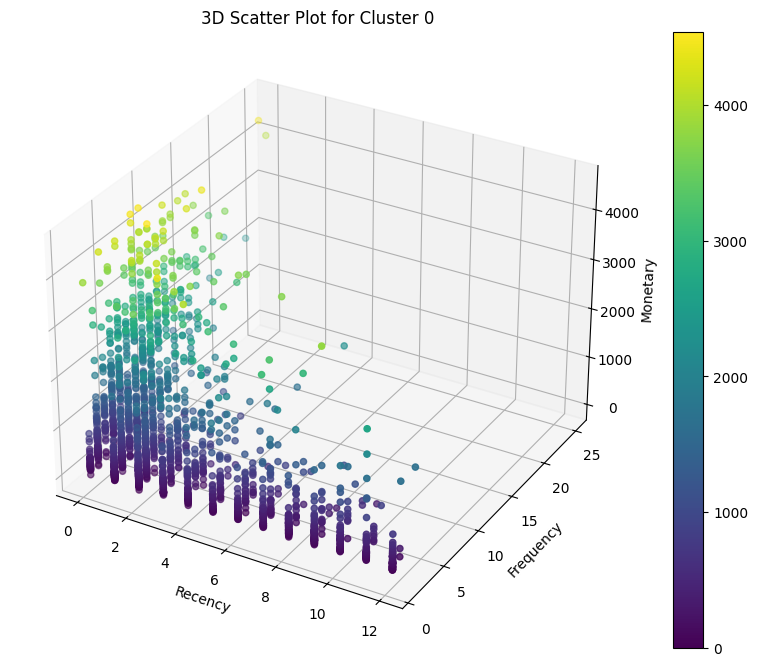

In [166]:
# Filter the data once for Cluster 0
plot_3d(0)

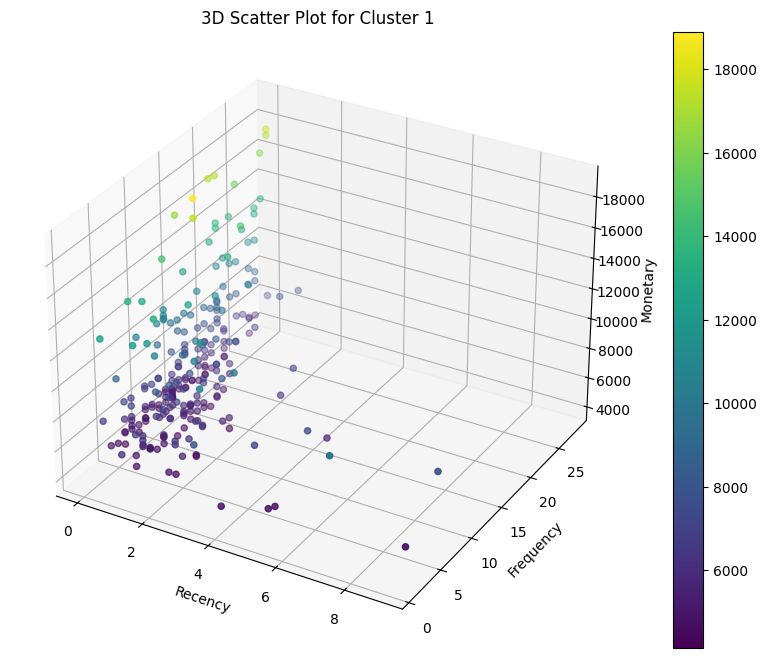

In [167]:
plot_3d(1)

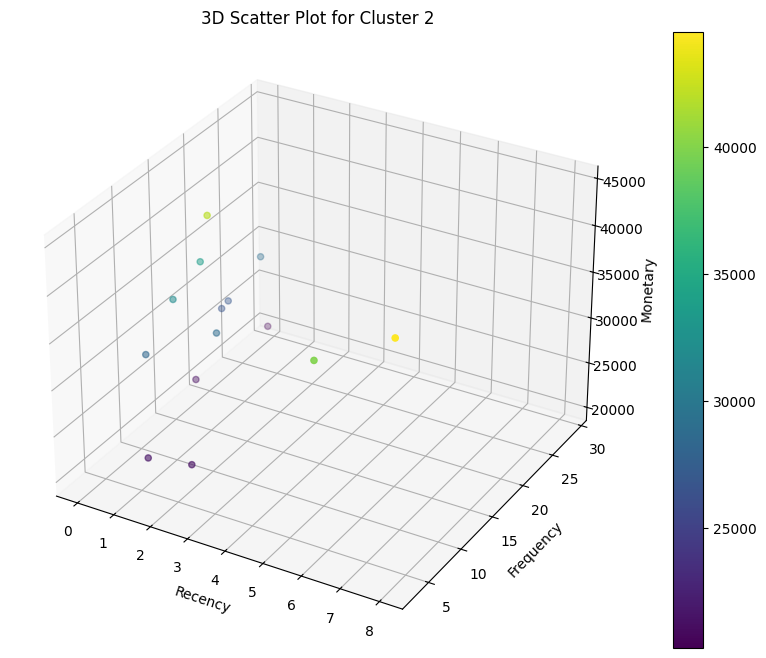

In [168]:
plot_3d(2)

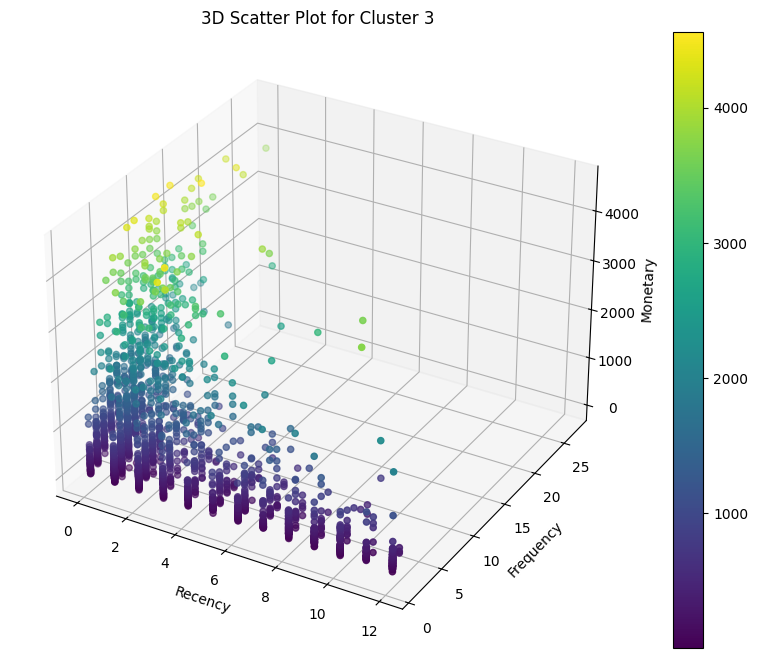

In [169]:
plot_3d(3)